<h1><center><font size="25">Graph Machine Learning: Grafos</font></center></h1>

<center><b>Fernando Carazo</b></center>

<center><i>Enero, 2023</i></center>

## Introducción

Un problema muy común en teoría de grafos es el de identificar grupos de nodos similares dentro de un grafo. Este problema también se le conoce como detección de comunidades. La detección de comunidades tiene muchísimas aplicaciones en diversos sectores. Un ejemplo muy conocido es el de detectar grupos de usuarios en una red social con intereses similares a los que dirigir una campaña de marqueting personalizada.


## Detección de comunidades
La detección de comunidades en teoría de grafos se refiere a la tarea de encontrar grupos o comunidades de nodos en un grafo que están más conectados entre sí que con el resto del grafo. Esto puede ser útil para entender mejor la estructura de un grafo y cómo están conectados sus nodos. La detección de comunidades se considera un problema importante en el análisis de redes y ha sido objeto de muchos estudios en la teoría de grafos.

Existen muchos algoritmos diferentes para detectar comunidades en un grafo, y el algoritmo adecuado depende del tipo de grafo y del problema en cuestión. Algunos de los algoritmos más comunes y relevantes son:

- Algoritmo de Louvain: este algoritmo es uno de los más populares y se basa en la idea de optimización modularidad, que busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades.

- Algoritmo de Girvan-Newman: este algoritmo se basa en la idea de eliminar gradualmente las aristas que conectan las comunidades, hasta que queden subgrafos desconectados que representan las comunidades.

- Algoritmo de Infomap: este algoritmo se basa en la idea de que los nodos de una comunidad tienen una probabilidad más alta de ser visitados por un recorrido aleatorio que los nodos del resto del grafo.

El algoritmo de Louvain es uno de los algoritmos más populares y eficientes para detectar comunidades en un grafo. Es una buena opción en situaciones en las que se desea encontrar comunidades en un grafo de manera rápida y eficiente. También es una buena opción cuando se desea encontrar comunidades que sean compactas y bien definidas. Además, el algoritmo de Louvain es fácil de implementar y puede manejar grafos grandes y complejos con eficiencia.

## Modularidad

El algoritmo de Louvain tiene como objetivo optimizar la modularidad. La modularidad es una medida que se utiliza en la teoría de grafos para evaluar la calidad de una partición de un grafo en comunidades. Esta medida busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades.

La modularidad se define como la diferencia entre el número de enlaces dentro de las comunidades y el número esperado de enlaces si los enlaces se distribuyeran de manera aleatoria en el grafo. Una alta modularidad indica que las comunidades encontradas tienen más conexiones que las esperadas por azar y,  por tanto, las comunidades son compactas y bien definidas, lo que es deseable en muchos casos. 

La modularidad tiene un rango de valores entre -0,5 y 1 y se define mediante la siguiente fórmula:

$$
Q=\frac{1}{2 m} \sum_{i j}\left[A_{i j}-\frac{k_i k_j}{2 m}\right] \delta\left(c_i, c_j\right)
$$
dónde
- $A_{i j}$ matriz de adyacencia (nodos $i$ y $j$). Puede ser de un grafo ponderado.;
- $k_i$ y $k_j$ son la suma de los pesos de la matriz de adyacencia de los ejes que conectan a los nodos $i$ y $j$, respectivamente;
- $m$ es la suma de todos los pesos de la matriz de adyacencia (en un grafo no ponderado, es el número de ejes);
- $c_i$ y $c_j$ son las comunidades a las que pertenecen los nodos $i$ y $j$; y
- $\delta$ es la función delta de Kronecker ( $\delta(x, y)=1$ si $x=y, 0$ en caso contrario), de tal forma que la fórmula sólo aplica si los nodos pertenecen a la misma comunidad.

En la siguiente imagen se muestran varios ejemplos de modularidad con distintas particiones. Se puede observar que la mejor partición es la de modularidad más alta.

![](https://github.com/fcarazo/network-science/blob/master/docs/img/06_modularity-graph-database-1.png?raw=true)

## Algoritmo de Louvain

El algoritmo de [Louvain](https://perso.uclouvain.be/vincent.blondel/research/louvain.html) es uno de los algoritmos más populares y eficientes para detectar comunidades en un grafo. Se basa en la idea de optimización modularidad, que busca maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades.

El algoritmo de Louvain se divide en dos fases: una fase de agrupamiento y una fase de refinamiento. 

- En la fase de agrupamiento, se comienza agrupando todos los nodos del grafo en una sola comunidad. Luego, se itera sobre cada nodo del grafo y se calcula la ganancia en modularidad que se obtendría al mover el nodo a una comunidad diferente. Si se obtiene una ganancia positiva, se mueve el nodo a la comunidad correspondiente. Esto se repite hasta que ya no se pueden obtener ganancias adicionales.

- la fase de refinamiento se aplica después de la fase de agrupamiento. Su objetivo es mejorar aún más la partición del grafo en comunidades encontrada en la fase de agrupamiento. Esta fase se realiza utilizando técnicas de agrupamiento jerárquico. Esto significa que se divide cada comunidad en subcomunidades, y luego se vuelve a calcular la modularidad de la partición resultante. Si se obtiene una ganancia positiva en modularidad, se mantiene la partición. Si no se obtiene una ganancia, se vuelve a la partición anterior. Esta etapa se repite hasta que ya no se pueden obtener ganancias adicionales en modularidad. 

Al final de esta fase, se obtiene una partición final del grafo en comunidades que es más compacta y bien definida que la obtenida en la fase de agrupamiento.

El algoritmo de Louvain fue propuesto por primera vez en un artículo titulado "Fast unfolding of communities in large networks" ("Despliegue rápido de comunidades en grandes redes"), publicado en la revista "Journal of Statistical Mechanics: Theory and Experiment" en 2008. En la siguiente imagen extraída del artículo, se resume el algoritmo.


![](https://github.com/fcarazo/network-science/blob/master/docs/img/07_louvain.png?raw=true)

## Detección de comunidades con Python

El algoritmo de Louvain se puede utilizar con Python utilizando el paquete de código abierto "Community". Este paquete se puede instalar utilizando el administrador de paquetes de Python, pip, de la siguiente manera:


`pip install python-louvain`

Una vez que se ha instalado el paquete, se puede importar el módulo community_louvain. Puede encontrar más documentación asociada con la función a la que nos referiremos aquí [4].

Esto debería devolver las comunidades asociadas detectadas desde G en forma de diccionario. Las claves del diccionario son los nodos y los valores corresponden a la comunidad a la que pertenece ese nodo.



In [ ]:
# pip install python-louvain

from community import community_louvain


# calculamos con el 
comms = community_louvain.best_partition(G, random_state=999)
comms.items()

dict_items([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2)])

## Visualización de comunidades

Filmente podemos visualizar las comunidades. Con este código coloreamos los nodos en base a las comunidades calculadas anteriormente:

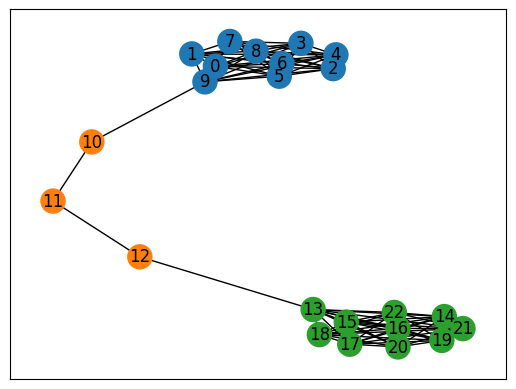

In [ ]:
import matplotlib.colors as mcolors

# Color de los nodos
cmap = dict(list(enumerate(mcolors.TABLEAU_COLORS.values())))
node_cmap = [cmap[v] for v in comms.values()]

nx.draw_networkx(G, node_color= node_cmap)

# Trabajo futuro
- 01 - Sistema de recomendación con graph machine learning
- 02 - GNNs
- 03 - Dynamic GNNs

# References



https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

http://networksciencebook.com/



## Información de sesión

In [ ]:
from sinfo import sinfo
sinfo()

## Bibliografía
<br>

Linear Models with R by Julian J.Faraway [libro](https://www.amazon.es/gp/product/1439887330/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=cienciadedato-21&creative=24630&linkCode=as2&creativeASIN=1439887330&linkId=e9ca62e854567fb3f9d0ea044f084b11)

**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Graph Machine Learning: Grafos by Fernando Carazo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>